# Recurrent Neural Network

- Wikipedia: https://en.wikipedia.org/wiki/Recurrent_neural_network
- Keras document about simple RNN: https://keras.io/layers/recurrent/#simplernn  
- Reference: https://github.com/yusugomori/deeplearning-keras-tf2-torch/blob/master/5/01_sin_rnn_keras.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.recurrent import SimpleRNN
from keras import layers, models,optimizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Let us define a sinusoidal function with random noise.

In [2]:
def f(t,T):
    u=np.random.uniform(-1,1,t.shape)
    return np.sin(2*np.pi/T*t)+0.05*u

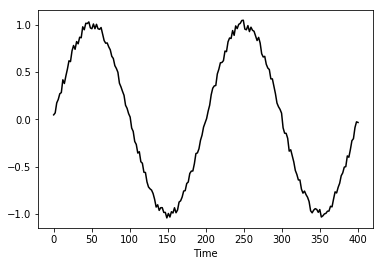

In [43]:
T=200 # period
N=200 # number of data points
t=np.linspace(0,2*T,N) # time

np.random.seed(4) # random seed for the noise
f_original=f(t,T) # y value
plt.plot(t,f_original,'k') # data visualization
plt.xlabel('Time')
plt.show()

Let us divide the data and create feature and target in the following way:  
|f(0) f(1) f(2) ... f(&tau;)| -> f(&tau;+1)  
|f(1) f(2) f(3) ... f(&tau;+1)| -> f(&tau;+2)  
...  
|f(t-&tau;-1) f(t-&tau;) f(t-&tau;+1) ... f(t-1)| -> f(t)  

In [4]:
max_len=25 # number of data that are used for making prediction(tau)

ts_data=[] 
target=[]

for i in range(0,N-max_len): 
    np.random.seed(4)
    ts_data.append(f(t,T)[i:i+max_len])
    np.random.seed(4)
    target.append(f(t,T)[i+max_len])
    
ts_data=np.array(ts_data)
target=np.array(target)

In [5]:
print("ts_data shape:",ts_data.shape)
print("target:",target.shape)

ts_data shape: (175, 25)
target: (175,)


Let us see the first row of ts_data.

In [6]:
ts_data[0]

array([0.04670298, 0.06782886, 0.17322814, 0.20979327, 0.26968584,
       0.28212698, 0.41751273, 0.37840109, 0.45926384, 0.53170306,
       0.61827498, 0.60986473, 0.72360347, 0.78011233, 0.73970756,
       0.8215251 , 0.79792264, 0.86753701, 0.86164826, 0.97763343,
       0.94660357, 1.01510853, 1.01219574, 1.02962763, 0.96579042])

The second row of ts_data is shifted compared to ts_data[0].

In [7]:
ts_data[1]

array([0.06782886, 0.17322814, 0.20979327, 0.26968584, 0.28212698,
       0.41751273, 0.37840109, 0.45926384, 0.53170306, 0.61827498,
       0.60986473, 0.72360347, 0.78011233, 0.73970756, 0.8215251 ,
       0.79792264, 0.86753701, 0.86164826, 0.97763343, 0.94660357,
       1.01510853, 1.01219574, 1.02962763, 0.96579042, 0.95746371])

The first number of target shown below is the last one in the ts_data[1].

In [23]:
target

array([ 0.95746371,  1.00755192,  0.95780743,  1.00393033,  0.95710987,
        0.95087773,  0.96988601,  0.90264864,  0.83205898,  0.80434958,
        0.80699248,  0.76565871,  0.734683  ,  0.66590139,  0.64286848,
        0.56721115,  0.53724377,  0.49683146,  0.38135322,  0.34273013,
        0.29572676,  0.25326321,  0.14815235,  0.11575759,  0.05983607,
        0.02376387, -0.09256719, -0.12784881, -0.23464738, -0.26538773,
       -0.35724069, -0.34266753, -0.44881148, -0.46470082, -0.55978388,
       -0.56253835, -0.66166243, -0.7155677 , -0.7352263 , -0.74869127,
       -0.78480744, -0.84574092, -0.92783492, -0.90403271, -0.96302977,
       -0.93439412, -0.93444918, -0.98481944, -0.98438336, -1.04271449,
       -0.99571216, -1.03331414, -0.97731845, -0.99101007, -0.93530356,
       -0.98809508, -0.95907695, -0.87509907, -0.86191691, -0.82265732,
       -0.75858203, -0.7541493 , -0.67887758, -0.66300678, -0.57285117,
       -0.54786891, -0.54647693, -0.46964384, -0.36245307, -0.35

In [24]:
X=ts_data.reshape(len(ts_data),max_len,1) 
y=target.reshape(len(ts_data),1)

print("X shape:",X.shape)
print("y shape:",y.shape)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, shuffle=False) # split data into training and validation set.

print("\nX_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

print("X_val shape:",X_val.shape)
print("y_val shape:",y_val.shape)

X shape: (175, 25, 1)
y shape: (175, 1)

X_train shape: (140, 25, 1)
y_train shape: (140, 1)
X_val shape: (35, 25, 1)
y_val shape: (35, 1)


Let us build a model. For detailed information, please refer to the [keras documentation](https://keras.io/layers/recurrent/#simplernn).

In [25]:
np.random.seed(1)

model = models.Sequential()
model.add(SimpleRNN(units=50, 
                    activation='tanh',
                    kernel_initializer='glorot_normal',
                    recurrent_initializer='orthogonal')) 

model.add(layers.Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True))

Let us start training the model.

In [26]:
batch_size= 100
epochs=1000

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=10,
                              verbose=1)

history=model.fit(X_train,y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_val,y_val),
                  callbacks=[earlystopping])

Train on 140 samples, validate on 35 samples
Epoch 1/1000
140/140 [==============================] - 0s 2ms/step - loss: 1.1833 - val_loss: 1.0319
Epoch 2/1000
140/140 [==============================] - 0s 109us/step - loss: 0.7562 - val_loss: 0.5628
Epoch 3/1000
140/140 [==============================] - 0s 133us/step - loss: 0.4848 - val_loss: 0.3007
Epoch 4/1000
140/140 [==============================] - 0s 128us/step - loss: 0.3080 - val_loss: 0.1625
Epoch 5/1000
140/140 [==============================] - 0s 125us/step - loss: 0.1692 - val_loss: 0.0955
Epoch 6/1000
140/140 [==============================] - 0s 115us/step - loss: 0.0749 - val_loss: 0.0629
Epoch 7/1000
140/140 [==============================] - 0s 124us/step - loss: 0.0456 - val_loss: 0.0459
Epoch 8/1000
140/140 [==============================] - 0s 131us/step - loss: 0.0502 - val_loss: 0.0304
Epoch 9/1000
140/140 [==============================] - 0s 125us/step - loss: 0.0466 - val_loss: 0.0281
Epoch 10/1000
140/140

140/140 [==============================] - 0s 139us/step - loss: 0.0011 - val_loss: 0.0027
Epoch 79/1000
140/140 [==============================] - 0s 138us/step - loss: 0.0012 - val_loss: 0.0027
Epoch 80/1000
140/140 [==============================] - 0s 130us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 81/1000
140/140 [==============================] - 0s 127us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 82/1000
140/140 [==============================] - 0s 146us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 83/1000
140/140 [==============================] - 0s 134us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 84/1000
140/140 [==============================] - 0s 134us/step - loss: 0.0011 - val_loss: 0.0025
Epoch 85/1000
140/140 [==============================] - 0s 131us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 86/1000
140/140 [==============================] - 0s 187us/step - loss: 0.0011 - val_loss: 0.0025
Epoch 87/1000
140/140 [==============================] - 0s 154us/ste

In [27]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

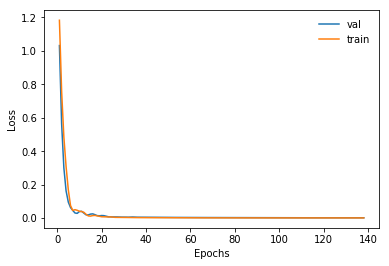

In [37]:
plt.plot(np.array(history.epoch)+1, history.history['val_loss'],label='val')
plt.plot(np.array(history.epoch)+1, history.history['loss'],label='train')
plt.legend(frameon=False)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The predicted data is obtained.

In [38]:
original = [f_original[i] for i in range(max_len)]
predicted = [None for i in range(max_len)] 

X0=X[:1] # shape: (1,25,1)

for i in range(N - max_len):
    pred = model.predict(X0[-1:]) # make a prediction
    predicted.append(pred[0,0]) # add to the list 
    
    X0=np.append(X0,pred)[1:] # Omit the first data and add the predicted data.
    X0=X0.reshape(-1,max_len,1) # reshape the data: 1, max_len, 1

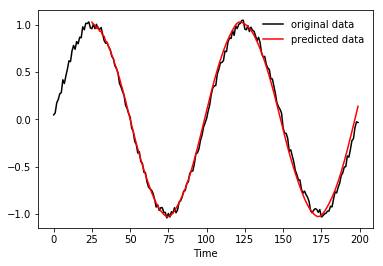

In [42]:
plt.plot(f_original, color='black' ,label='original data')
plt.plot(predicted, color='red', label='predicted data')
plt.legend(frameon=False)
plt.xlabel('Time')
plt.show()